# Task 1.1 Exploratory Data Analysis

### Dataset - Titanic Dataset

In [1]:
! pip install pyspark

     |████████████████████████████████| 204.2 MB 23 kB/s s eta 0:00:01
     |████████████████████████████████| 198 kB 34.7 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612244 sha256=02b6d8fce8b2a156bbe8bbe928f211a2a8aa819429a6d88d2ac81822e36f1948
  Stored in directory: /root/.cache/pip/wheels/5e/34/fa/b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built pyspark


In [2]:
import pandas as pd
import os
from pyspark.sql import SparkSession, DataFrame, functions as P
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
spark = SparkSession.builder.appName('Titanic').config('spark.driver.memory','15g').getOrCreate()
spark

In [4]:
data = spark.read.csv('/kaggle/input/titanicdataset-traincsv/train.csv', inferSchema = True, header=True)

In [5]:
data.show()

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [6]:
rows = data.count()
cols = len(data.dtypes)
print('Number of Rows',rows)
print('Number of Columns',cols)

Number of Rows 891
Number of Columns 12


In [7]:
# This function drops rows with null values (rows having atleast a null value is dropped)
data.na.drop().show()

+-----------+--------+------+--------------------+------+----+-----+-----+-----------+--------+-----------+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|     Ticket|    Fare|      Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+-----------+--------+-----------+--------+
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|   PC 17599| 71.2833|        C85|       C|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|     113803|    53.1|       C123|       S|
|          7|       0|     1|McCarthy, Mr. Tim...|  male|54.0|    0|    0|      17463| 51.8625|        E46|       S|
|         11|       1|     3|Sandstrom, Miss. ...|female| 4.0|    1|    1|    PP 9549|    16.7|         G6|       S|
|         12|       1|     1|Bonnell, Miss. El...|female|58.0|    0|    0|     113783|   26.55|       C103|       S|
|         22|       1|     2|Beesley, Mr. Lawr...|  male|34.0|  

In [8]:
data = data.toPandas()

In [9]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,881,882,883,884,885,886,887,888,889,890
PassengerId,1,2,3,4,5,6,7,8,9,10,...,882,883,884,885,886,887,888,889,890,891
Survived,0,1,1,1,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,1,0
Pclass,3,1,3,1,3,3,1,3,3,2,...,3,3,2,3,3,2,1,3,1,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)",...,"Markun, Mr. Johann","Dahlberg, Miss. Gerda Ulrika","Banfield, Mr. Frederick James","Sutehall, Mr. Henry Jr","Rice, Mrs. William (Margaret Norton)","Montvila, Rev. Juozas","Graham, Miss. Margaret Edith","""Johnston, Miss. Catherine Helen """"Carrie""""""","Behr, Mr. Karl Howell","Dooley, Mr. Patrick"
Sex,male,female,female,female,male,male,male,male,female,female,...,male,female,male,male,female,male,female,female,male,male
Age,22,38,26,35,35,NaN,54,2,27,14,...,33,22,28,25,39,27,19,NaN,26,32
SibSp,1,1,0,1,0,0,0,3,0,1,...,0,0,0,0,0,0,0,1,0,0
Parch,0,0,0,0,0,0,0,1,2,0,...,0,0,0,0,5,0,0,2,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,...,349257,7552,C.A./SOTON 34068,SOTON/OQ 392076,382652,211536,112053,W./C. 6607,111369,370376
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,...,7.8958,10.5167,10.5,7.05,29.125,13,30,23.45,30,7.75


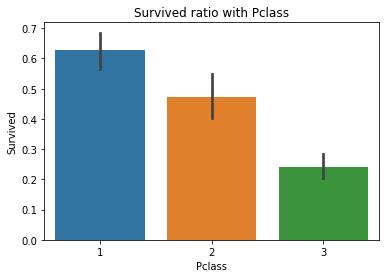

In [10]:
plt.title('Survived ratio with Pclass')
sns.barplot(x=data['Pclass'], y=data['Survived'])

### Conclusion:

This barplot shows that First Class people survival rate was the highest and Third Class people survival rate is the least.

## Task 1.2 Recommendation Engine

### Dataset - Amazon Review

In [11]:
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
from pyspark.sql.functions import col


spark = SparkSession.builder.appName('Recommendation_Engine').getOrCreate()
data = spark.read.json("/kaggle/input/musical-instruments-5/Musical_Instruments_5.json")
data.show()

+----------+--------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+
|      asin| helpful|overall|          reviewText| reviewTime|    reviewerID|        reviewerName|             summary|unixReviewTime|
+----------+--------+-------+--------------------+-----------+--------------+--------------------+--------------------+--------------+
|1384719342|  [0, 0]|    5.0|Not much to write...|02 28, 2014|A2IBPI20UZIR0U|cassandra tu "Yea...|                good|    1393545600|
|1384719342|[13, 14]|    5.0|The product does ...|03 16, 2013|A14VAT5EAX3D9S|                Jake|                Jake|    1363392000|
|1384719342|  [1, 1]|    5.0|The primary job o...|08 28, 2013|A195EZSQDW3E21|Rick Bennette "Ri...|It Does The Job Well|    1377648000|
|1384719342|  [0, 0]|    5.0|Nice windscreen p...|02 14, 2014|A2C00NNG1ZQQG2|RustyBill "Sunday...|GOOD WINDSCREEN F...|    1392336000|
|1384719342|  [0, 0]|    5.0|This pop filter i...|02 21

In [12]:
data_new = data.select(data['asin'], data['overall'],data['reviewerID'])
data_new.show()

+----------+-------+--------------+
|      asin|overall|    reviewerID|
+----------+-------+--------------+
|1384719342|    5.0|A2IBPI20UZIR0U|
|1384719342|    5.0|A14VAT5EAX3D9S|
|1384719342|    5.0|A195EZSQDW3E21|
|1384719342|    5.0|A2C00NNG1ZQQG2|
|1384719342|    5.0| A94QU4C90B1AX|
|B00004Y2UT|    5.0|A2A039TZMZHH9Y|
|B00004Y2UT|    5.0|A1UPZM995ZAH90|
|B00004Y2UT|    3.0| AJNFQI3YR6XJ5|
|B00004Y2UT|    5.0|A3M1PLEYNDEYO8|
|B00004Y2UT|    5.0| AMNTZU1YQN1TH|
|B00004Y2UT|    5.0|A2NYK9KWFMJV4Y|
|B00005ML71|    4.0|A35QFQI0M46LWO|
|B00005ML71|    3.0|A2NIT6BKW11XJQ|
|B00005ML71|    5.0|A1C0O09LOLVI39|
|B00005ML71|    5.0|A17SLR18TUMULM|
|B00005ML71|    2.0|A2PD27UKAD3Q00|
|B000068NSX|    4.0| AKSFZ4G1AXYFC|
|B000068NSX|    5.0| A67OJZLHBBUQ9|
|B000068NSX|    5.0|A2EZWZ8MBEDOLN|
|B000068NSX|    5.0|A1CL807EOUPVP1|
+----------+-------+--------------+
only showing top 20 rows



In [13]:
indexer = [StringIndexer(inputCol=column, outputCol=column+"_index") for column in list(set(data_new.columns)-set(['overall'])) ]
pipeline = Pipeline(stages=indexer)
transformed_data = pipeline.fit(data_new).transform(data_new)
transformed_data.show()

+----------+-------+--------------+----------------+----------+
|      asin|overall|    reviewerID|reviewerID_index|asin_index|
+----------+-------+--------------+----------------+----------+
|1384719342|    5.0|A2IBPI20UZIR0U|            66.0|     703.0|
|1384719342|    5.0|A14VAT5EAX3D9S|           266.0|     703.0|
|1384719342|    5.0|A195EZSQDW3E21|           395.0|     703.0|
|1384719342|    5.0|A2C00NNG1ZQQG2|          1048.0|     703.0|
|1384719342|    5.0| A94QU4C90B1AX|          1311.0|     703.0|
|B00004Y2UT|    5.0|A2A039TZMZHH9Y|            51.0|     562.0|
|B00004Y2UT|    5.0|A1UPZM995ZAH90|           290.0|     562.0|
|B00004Y2UT|    3.0| AJNFQI3YR6XJ5|           374.0|     562.0|
|B00004Y2UT|    5.0|A3M1PLEYNDEYO8|            13.0|     562.0|
|B00004Y2UT|    5.0| AMNTZU1YQN1TH|           183.0|     562.0|
|B00004Y2UT|    5.0|A2NYK9KWFMJV4Y|             4.0|     562.0|
|B00005ML71|    4.0|A35QFQI0M46LWO|           488.0|     704.0|
|B00005ML71|    3.0|A2NIT6BKW11XJQ|     

In [14]:
(train,test)=transformed_data.randomSplit([0.8, 0.2])

In [15]:
als=ALS(maxIter=5,regParam=0.09,rank=25,userCol="reviewerID_index",itemCol="asin_index",ratingCol="overall",coldStartStrategy="drop",nonnegative=True)

model=als.fit(train)

In [16]:
evaluator=RegressionEvaluator(metricName="mse",labelCol="overall",predictionCol="prediction")

predictions=model.transform(test)
rmse=evaluator.evaluate(predictions)

print("MSE="+str(rmse))
predictions.show()

MSE=1.5269796587906852
+----------+-------+--------------+----------------+----------+----------+
|      asin|overall|    reviewerID|reviewerID_index|asin_index|prediction|
+----------+-------+--------------+----------------+----------+----------+
|B0002E5266|    5.0| AFS3FQR5JSDVJ|            72.0|     471.0|  4.071895|
|B0002E5266|    4.0|A3CUYX2VXZM9KO|           499.0|     471.0| 4.2643924|
|B000KIPTE4|    5.0|A23BIOQUMRC7K5|           663.0|     496.0|  4.335151|
|B000KIPTE4|    5.0|A37E0KYNJQNP1E|           491.0|     496.0|   4.23389|
|B000KIPTE4|    5.0|A2F2L5F9OWWVY6|            24.0|     496.0| 5.0353475|
|B003AYJU5O|    5.0|A205483DF7XVDE|            61.0|     833.0| 3.7643297|
|B003AYJU5O|    5.0|A3BTH66WVCQAM9|            68.0|     833.0| 3.5174956|
|B000A2HDXA|    3.0|A1EMTRDX5PBNCP|           148.0|     243.0| 3.4812255|
|B000A2HDXA|    5.0|A34KO3JNKTZU6Y|           168.0|     243.0|  4.645892|
|B000A2HDXA|    1.0| ANZGC4YCEQC6W|           560.0|     243.0|  4.008424|
|B

# Task 1.3 Classification

### Dataset - Titanic dataset

In [75]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import StringIndexer, VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from itertools import chain
from pyspark.sql.functions import count, mean, when, lit, create_map, regexp_extract

In [62]:
spark = SparkSession.builder.appName('Classification').getOrCreate()

In [63]:
data = spark.read.csv('/kaggle/input/titanicdataset-traincsv/train.csv',header=True, inferSchema=True)

In [64]:
data.printSchema()

root
 |-- PassengerId: integer (nullable = true)
 |-- Survived: integer (nullable = true)
 |-- Pclass: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- SibSp: integer (nullable = true)
 |-- Parch: integer (nullable = true)
 |-- Ticket: string (nullable = true)
 |-- Fare: double (nullable = true)
 |-- Cabin: string (nullable = true)
 |-- Embarked: string (nullable = true)



In [65]:
data.show(10)

+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|PassengerId|Survived|Pclass|                Name|   Sex| Age|SibSp|Parch|          Ticket|   Fare|Cabin|Embarked|
+-----------+--------+------+--------------------+------+----+-----+-----+----------------+-------+-----+--------+
|          1|       0|     3|Braund, Mr. Owen ...|  male|22.0|    1|    0|       A/5 21171|   7.25| null|       S|
|          2|       1|     1|Cumings, Mrs. Joh...|female|38.0|    1|    0|        PC 17599|71.2833|  C85|       C|
|          3|       1|     3|Heikkinen, Miss. ...|female|26.0|    0|    0|STON/O2. 3101282|  7.925| null|       S|
|          4|       1|     1|Futrelle, Mrs. Ja...|female|35.0|    1|    0|          113803|   53.1| C123|       S|
|          5|       0|     3|Allen, Mr. Willia...|  male|35.0|    0|    0|          373450|   8.05| null|       S|
|          6|       0|     3|    Moran, Mr. James|  male|null|    0|    0|      

In [66]:
data.toPandas()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"""Johnston, Miss. Catherine Helen """"Carrie""""""",female,NaN,1,2,W./C. 6607,23.4500,None,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [68]:
for col in data.columns:
    print(col.ljust(20), data.filter(data[col].isNull()).count())

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  177
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin                687
Embarked             2


In [69]:
data.select('Fare', 'Embarked').summary('mean', '50%', 'max').show()

+-------+----------------+--------+
|summary|            Fare|Embarked|
+-------+----------------+--------+
|   mean|32.2042079685746|    null|
|    50%|         14.4542|    null|
|    max|        512.3292|       S|
+-------+----------------+--------+



In [70]:
data = data.fillna({'Embarked': 'S', 'Fare':14.45})

In [73]:
data = data.withColumn('Title', regexp_extract(data['Name'],\
                '([A-Za-z]+)\.', 1))

data.groupBy('Title').agg(count('Age'), mean('Age')).sort('count(Age)').show()

+--------+----------+------------------+
|   Title|count(Age)|          avg(Age)|
+--------+----------+------------------+
|Countess|         1|              33.0|
|     Sir|         1|              49.0|
|     Mme|         1|              24.0|
|    Capt|         1|              70.0|
|Jonkheer|         1|              38.0|
|     Don|         1|              40.0|
|      Ms|         1|              28.0|
|    Lady|         1|              48.0|
|     Col|         2|              58.0|
|   Major|         2|              48.5|
|    Mlle|         2|              24.0|
|     Rev|         6|43.166666666666664|
|      Dr|         6|              42.0|
|  Master|        36| 4.574166666666667|
|     Mrs|       108|35.898148148148145|
|    Miss|       146|21.773972602739725|
|      Mr|       398|32.368090452261306|
+--------+----------+------------------+



In [77]:
title_dic = {'Mr':'Mr', 'Miss':'Miss', 'Mrs':'Mrs', 'Master':'Master', \
             'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',\
             'Don': 'Mr', 'Mme': 'Miss', 'Jonkheer': 'Mr', 'Lady': 'Mrs',\
             'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs', \
             'Dr':'Mr', 'Rev':'Mr'}

mapping = create_map([lit(x) for x in chain(*title_dic.items())])

data = data.withColumn('Title', mapping[data['Title']])
data.groupBy('Title').mean('Age').show()

+------+------------------+
| Title|          avg(Age)|
+------+------------------+
|  Miss|             21.86|
|Master| 4.574166666666667|
|    Mr| 33.02272727272727|
|   Mrs|35.981818181818184|
+------+------------------+



In [78]:
def age_imputer(data, title, age):
    return data.withColumn('Age', \
                         when((data['Age'].isNull()) & (data['Title']==title), \
                              age).otherwise(data['Age']))

In [79]:
data = age_imputer(data, 'Mr', 33.02)
data = age_imputer(data, 'Mrs', 35.98)
data = age_imputer(data, 'Miss', 21.86)
data = age_imputer(data, 'Master', 4.75)

In [80]:
data = data.withColumn('FamilySize', data['Parch'] + data['SibSp']).\
            drop('Parch', 'SibSp')

In [81]:
data = data.drop('PassengerID', 'Cabin', 'Name', 'Ticket', 'Title')

In [82]:
for col in data.columns:
    print(col.ljust(20), data.filter(data[col].isNull()).count())

Survived             0
Pclass               0
Sex                  0
Age                  0
Fare                 0
Embarked             0
FamilySize           0


In [83]:
stringIndex = StringIndexer(inputCols=['Sex', 'Embarked'], 
                       outputCols=['SexNum', 'EmbNum'])


stringIndex_model = stringIndex.fit(data)

data = stringIndex_model.transform(data).drop('Sex', 'Embarked')

In [84]:
data.show(5)

+--------+------+----+-------+----------+------+------+
|Survived|Pclass| Age|   Fare|FamilySize|SexNum|EmbNum|
+--------+------+----+-------+----------+------+------+
|       0|     3|22.0|   7.25|         1|   0.0|   0.0|
|       1|     1|38.0|71.2833|         1|   1.0|   1.0|
|       1|     3|26.0|  7.925|         0|   1.0|   0.0|
|       1|     1|35.0|   53.1|         1|   1.0|   0.0|
|       0|     3|35.0|   8.05|         0|   0.0|   0.0|
+--------+------+----+-------+----------+------+------+
only showing top 5 rows



In [85]:
vec_asmbl = VectorAssembler(inputCols=data.columns[1:], 
                           outputCol='features')


data = vec_asmbl.transform(data).select('features', 'Survived')


In [86]:
train, test = data.randomSplit([0.7,0.3])

In [87]:
evaluator = MulticlassClassificationEvaluator(labelCol='Survived', 
                                          metricName='accuracy')

ridge = LogisticRegression(labelCol='Survived', 
                        maxIter=100, 
                        elasticNetParam=0,  
                        regParam=0.03)


model = ridge.fit(train)
pred = model.transform(test)
evaluator.evaluate(pred)

0.8109090909090909

In [ ]:
!jupyter nbconvert --to pdf /kaggle/input/hello-world-turn-this-into-a-pdf/__notebook__.ipynb --output /kaggle/working/output.pdf